# PROJECT 1:

## Exploratory Data Analysis on the World Happiness Report 2020

This notebook is a part of my first project required by the IBM Machine Learning Program.

I will clean the data and explore the relationship between the target (Dystopia + residual levels of happiness) and potential predictors.

Source Data: https://www.kaggle.com/londeen/world-happiness-report-2020

Notebook Contents:

    Data Overview
    Data Cleaning and Feature Engineering: Categorical Data
    Data Cleaning and Feature Engineering: Numeric Data
    Hypothesis Formulation + Testing

## 1. DATA OVERVIEW 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
#Importing of libraries for EDA

In [6]:
# We take a preliminary look at the data after loading it
filepath = "WHR20_DataForFigure2.1.csv"
data = pd.read_csv(filepath)
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [7]:
print("Number of rows in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])
data = data.copy() # Keep a copy our original data 
# There are 153 columns and 20 rows in this dataset. 

Number of rows in the data: 153
Number of columns in the data: 20


In [8]:
# The different columns in the dataset
print(data.columns.tolist())

['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']


In [9]:
# The different types of data
print(data.dtypes)

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [11]:
# We count every missing value in each column
data.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [12]:
# We double-check for any missing values
# value 'True' indicates that missing value is exist, while 'False' indicates there are no missing value
data.isnull().values.any()

False

## 2. DATA FEATURE ENGINEERING 

#### From the codes above we can see that there are no missing values in this dataset. Now we get the descriptive statistics of the numerical attributes in the dataset below.

In [13]:
# Get descriptive statistics of the dataset
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,2.227738e-16,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


### CATEGORICAL VARIABLES

In [18]:
# We are going to use hot encoding to convert categorical variables to dummies
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T

,0,1,2,3,4
Country name,Finland,Denmark,Switzerland,Iceland,Norway
Regional indicator,Western Europe,Western Europe,Western Europe,Western Europe,Western Europe


In [19]:
# We will then log transforming skew variables
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [20]:
# We then show the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Explained by: Perceptions of corruption,1.677125
Standard error of ladder score,1.450652
Explained by: Generosity,0.848921
Generosity,0.848921
Social support,-1.165826
Explained by: Social support,-1.165826
Perceptions of corruption,-1.677125


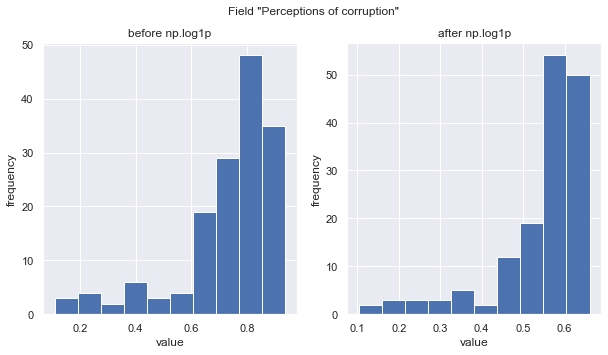

In [21]:
# We will now look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Perceptions of corruption"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
data[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
data[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

### NUMERICAL VARIABLES

In [22]:
# We may now perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    data[col] = data[col].apply(np.log1p)

In [34]:
# We now pick out a few numeric columns to illustrate basic feature transformations.
smaller_data = data.loc[:,['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                      'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 
                      'Explained by: Healthy life expectancy','Dystopia + residual']]

In [35]:
# Now we take a look at the summary statistics of the subset data
smaller_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Logged GDP per capita,153.0,9.295706,1.201588e+00,6.492642,8.350645,9.456313,10.265124,11.450681
Social support,153.0,0.590240,7.033987e-02,0.277222,0.552284,0.603881,0.645399,0.680401
Healthy life expectancy,153.0,64.445529,7.057848e+00,45.200001,58.961712,66.305145,69.289192,76.804581
Freedom to make life choices,153.0,0.783360,1.177863e-01,0.396573,0.714839,0.799805,0.877709,0.974998
Generosity,153.0,-0.025914,1.490434e-01,-0.357972,-0.135837,-0.034244,0.081976,0.445111
Perceptions of corruption,153.0,0.544100,1.122217e-01,0.104166,0.520589,0.578366,0.614727,0.660410
Ladder score in Dystopia,153.0,1.972317,2.227738e-16,1.972317,1.972317,1.972317,1.972317,1.972317
Explained by: Log GDP per capita,153.0,0.868771,3.724157e-01,0.000000,0.575862,0.918549,1.169229,1.536676
Explained by: Social support,153.0,0.757885,1.491880e-01,0.000000,0.686484,0.790268,0.870096,0.935139
Explained by: Healthy life expectancy,153.0,0.692869,2.540935e-01,0.000000,0.495443,0.759818,0.867249,1.137814


In [38]:
smaller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Logged GDP per capita                  153 non-null    float64
 1   Social support                         153 non-null    float64
 2   Healthy life expectancy                153 non-null    float64
 3   Freedom to make life choices           153 non-null    float64
 4   Generosity                             153 non-null    float64
 5   Perceptions of corruption              153 non-null    float64
 6   Ladder score in Dystopia               153 non-null    float64
 7   Explained by: Log GDP per capita       153 non-null    float64
 8   Explained by: Social support           153 non-null    float64
 9   Explained by: Healthy life expectancy  153 non-null    float64
 10  Dystopia + residual                    153 non-null    float64
dtypes: flo

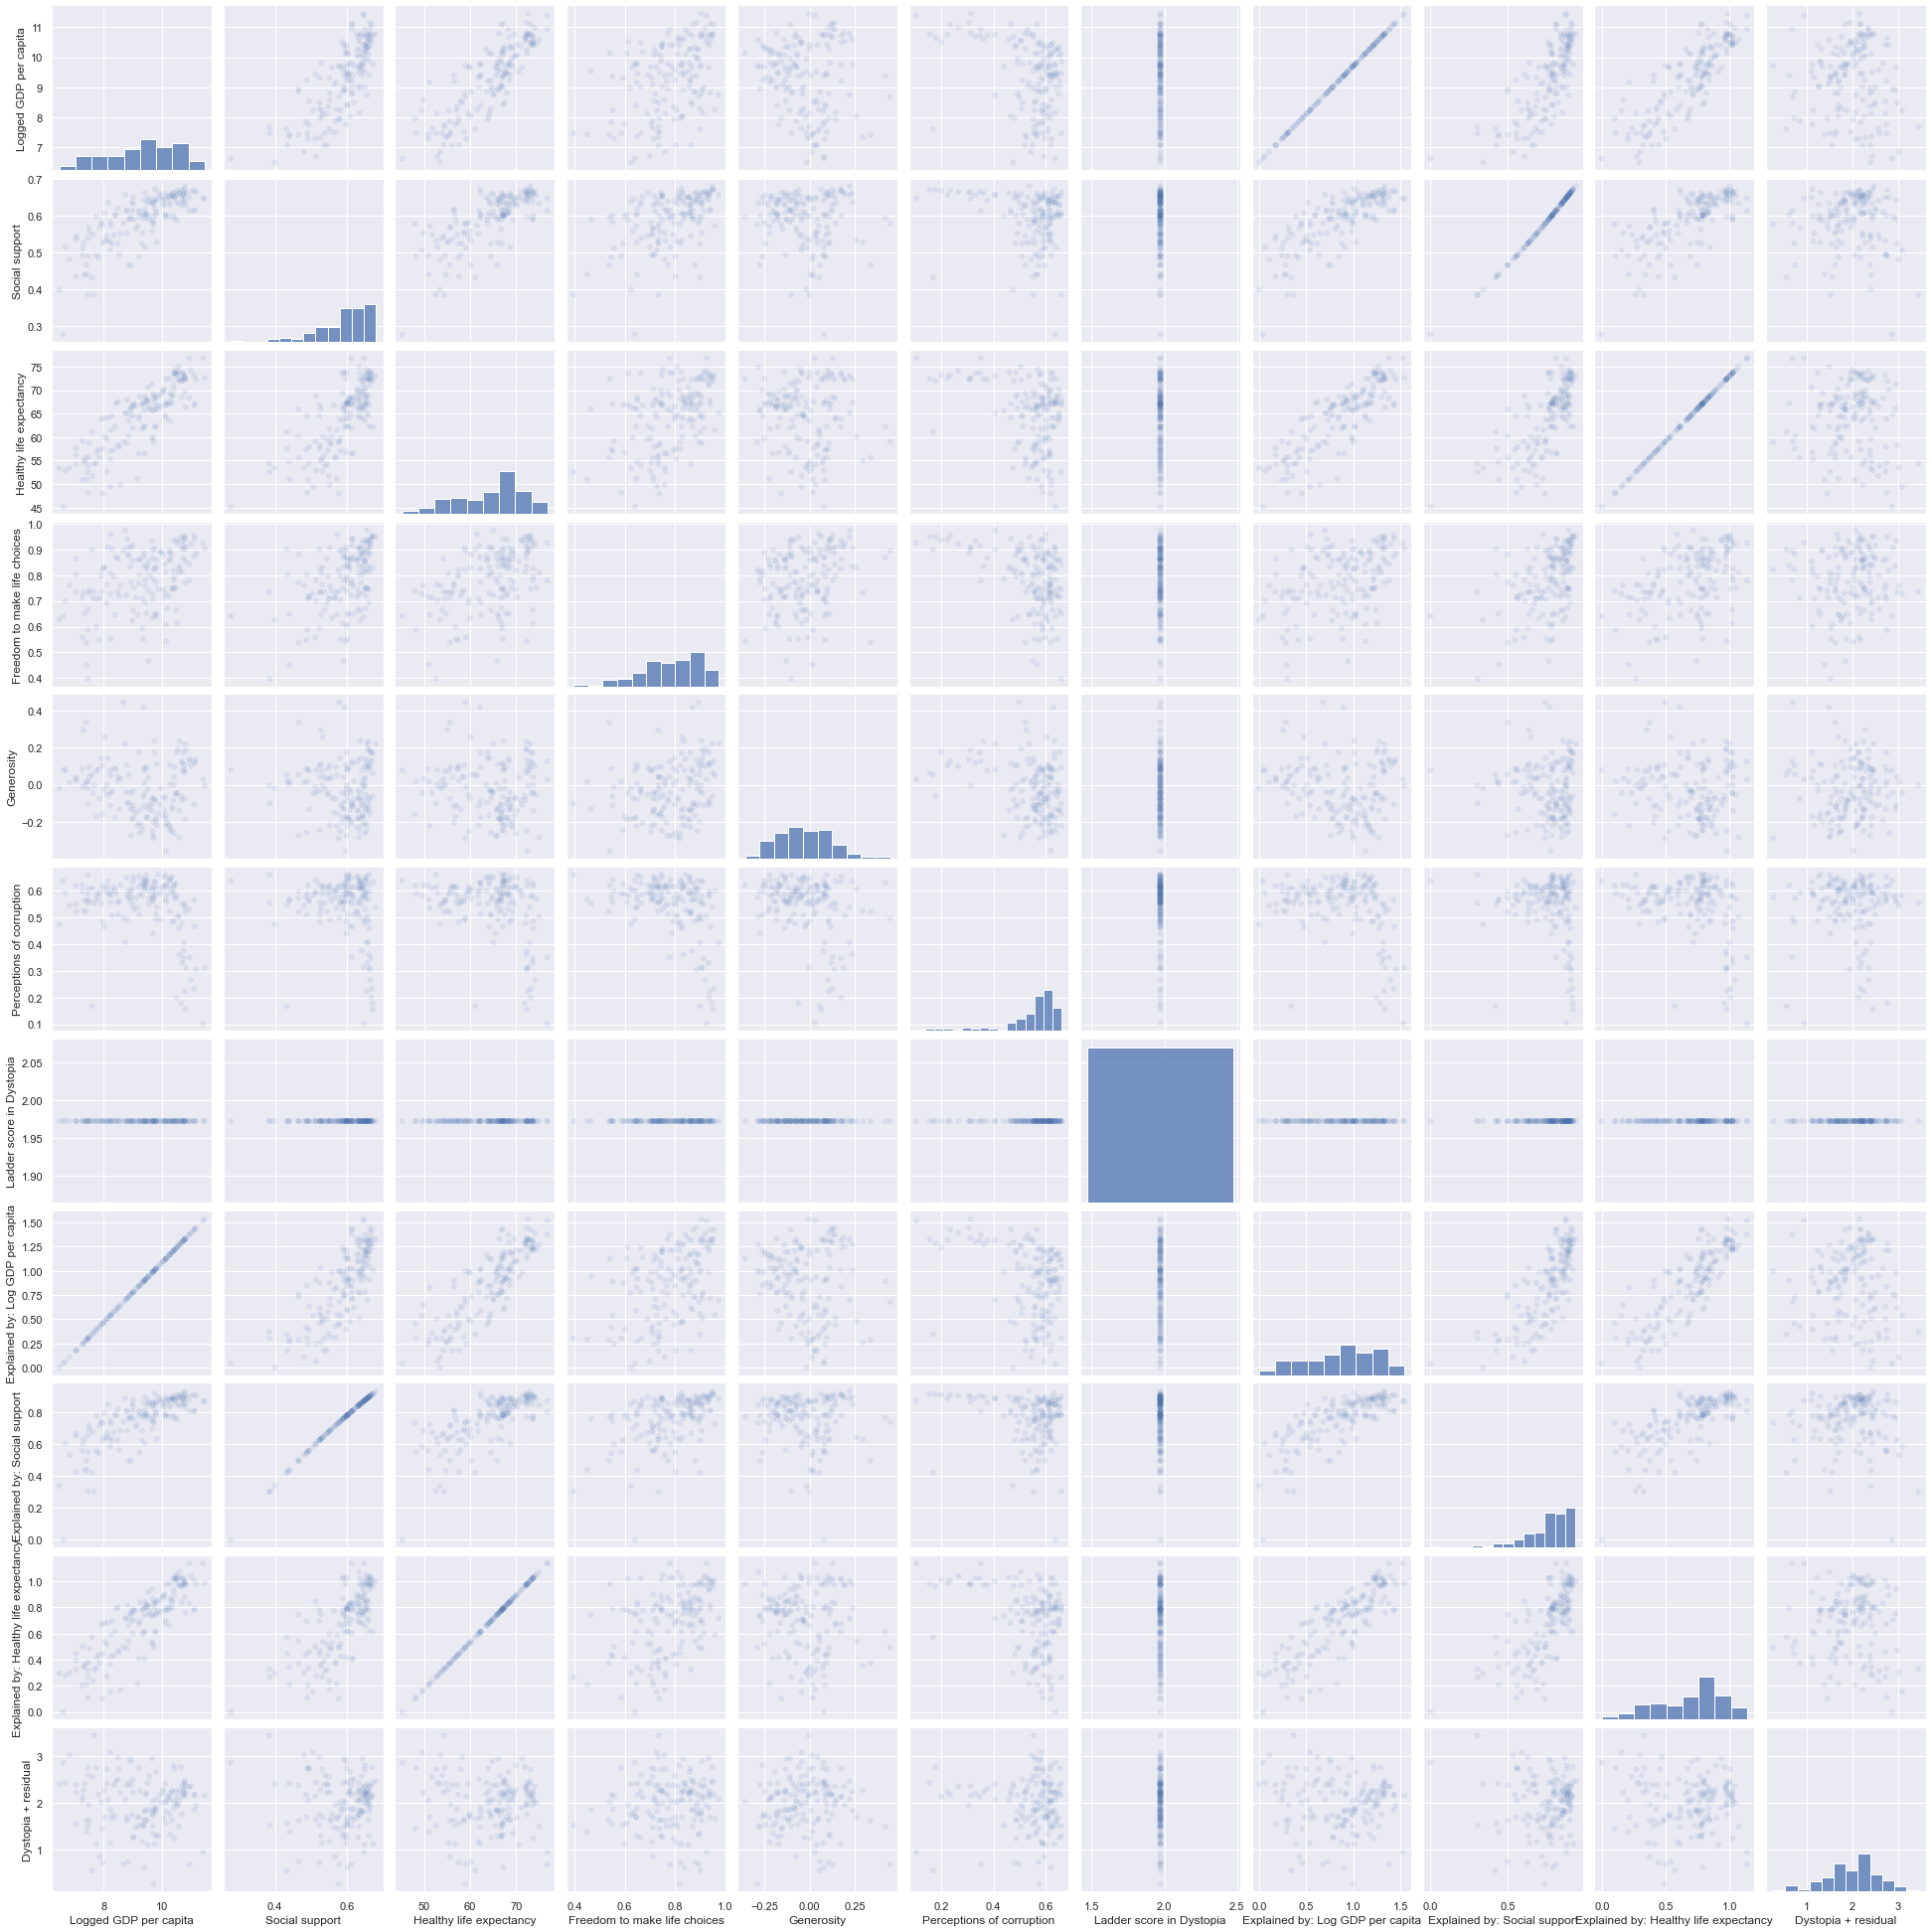

In [37]:
# There appears to be no NaN values in the data set. Our dataset is perfectly filtered.
# We will now generate pairplot visuals to better understand the target and feature-target relationships
sns.pairplot(smaller_data, plot_kws=dict(alpha=.1, edgecolor='none'))

### From the pairplot above we can see that the target variable does not seem to have a linear relationship with any of the features.
### As far as the relationship between the various features, we would like to ensure that there is not a excessive multi-collinearity between each one of our features, as that can throw off our interpretation of something like linear regression.

In [40]:
#We will now separate our features from our target

X = smaller_data.loc[:,['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                      'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 
                      'Explained by: Healthy life expectancy']]

y = smaller_data['Dystopia + residual']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Logged GDP per capita                  153 non-null    float64
 1   Social support                         153 non-null    float64
 2   Healthy life expectancy                153 non-null    float64
 3   Freedom to make life choices           153 non-null    float64
 4   Generosity                             153 non-null    float64
 5   Perceptions of corruption              153 non-null    float64
 6   Ladder score in Dystopia               153 non-null    float64
 7   Explained by: Log GDP per capita       153 non-null    float64
 8   Explained by: Social support           153 non-null    float64
 9   Explained by: Healthy life expectancy  153 non-null    float64
dtypes: float64(10)
memory usage: 12.1 KB


### Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. 
### We will now create a **train/validation split** before we fit and score the model. 
### We will be repeatedly splitting X, y into the same train/val partitions and fitting new models as we update our feature set.
### We will therefore add quadratic polynomial transformations to features that seem to have a linear relationship with each other.

In [43]:
X2 = X.copy()

X2['HLE2'] = X2['Healthy life expectancy'] ** 2
X2['EBHLE2'] = X2['Explained by: Healthy life expectancy'] ** 2

### Categories and features derived from category aggregates


In [50]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
features = ['Healthy life expectancy', 'Explained by: Healthy life expectancy']
pf.fit(data[features])

PolynomialFeatures()

In [52]:
pf.get_feature_names()

C:\Users\Khobie Maseko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [56]:
feat_array = pf.transform(data[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

,1,Healthy life expectancy,Explained by: Healthy life expectancy,Healthy life expectancy^2,Healthy life expectancy Explained by: Healthy life expectancy,Explained by: Healthy life expectancy^2
0,1.0,71.900825,0.961271,5169.728708,69.116208,0.924043
1,1.0,72.402504,0.979333,5242.122581,70.906130,0.959092
2,1.0,74.102448,1.040533,5491.172727,77.106056,1.082709
3,1.0,73.000000,1.000843,5329.000000,73.061569,1.001688
4,1.0,73.200783,1.008072,5358.354600,73.791652,1.016209
...,...,...,...,...,...,...
148,1.0,45.200001,0.000000,2043.040069,0.000000,0.000000
149,1.0,61.098846,0.572383,3733.069036,34.971958,0.327623
150,1.0,55.617260,0.375038,3093.279608,20.858564,0.140653
151,1.0,51.000000,0.208809,2601.000000,10.649261,0.043601


## 3. HYPOTHESIS FORMULATION

### From the above analysis, we got some insight about the data. Since this data can be used to make a prediction model that can determine which factors have strong or weak correlation with the Happiness level of a country. I have made several hypothesis regarding to this matter but I will only be testing the first one for purposes of this project.

Hypothesis 1:

H0 = Healthy life expectancy has a positive correlation with citizens' happiness.

Ha = Healthy life expectancy has a negative correlation with citizens' happiness.

Hypothesis 2:

H0 = Logged GDP per capita has a positive correlation with citizens' happiness.

Ha = Logged GDP per capita has a negative correlation with citizens' happiness.

Hypothesis 3:

H0 = The Freedom to make life choices has a positive correlation with citizens' happiness.

Ha = The Freedom to make life choices has a negative correlation with citizens' happiness.

### HYPOTHESIS TESTING AND RESULTS

In [61]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [63]:
# We will make a new dataframe and obtain its preview
new_data2 = pd.DataFrame({'Healthy life expectancy': data['Healthy life expectancy'], 'Logged GDP per capita': data['Logged GDP per capita'], 'Freedom to make life choices': data['Freedom to make life choices'], 'Dystopia + residual': data['Dystopia + residual']})
new_data2.head()

,Healthy life expectancy,Logged GDP per capita,Freedom to make life choices,Dystopia + residual
0,71.900825,10.639267,0.949172,2.762835
1,72.402504,10.774001,0.951444,2.432741
2,74.102448,10.979933,0.921337,2.350267
3,73.000000,10.772559,0.948892,2.460688
4,73.200783,11.087804,0.955750,2.168266


In [64]:
# All values are numerical
# Now we obtain the correlation table
new_data2.corr()

,Healthy life expectancy,Logged GDP per capita,Freedom to make life choices,Dystopia + residual
Healthy life expectancy,1.000000,0.848469,0.448846,-0.039948
Logged GDP per capita,0.848469,1.000000,0.419019,-0.062063
Freedom to make life choices,0.448846,0.419019,1.000000,0.062571
Dystopia + residual,-0.039948,-0.062063,0.062571,1.000000


### We also generate a visualization of the correlation using heatmap.

<AxesSubplot:>

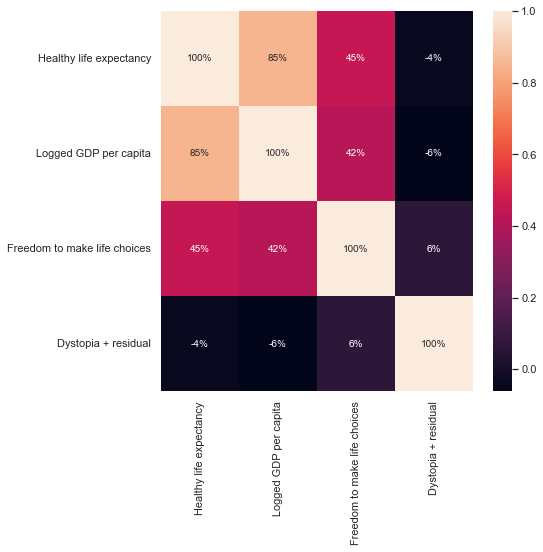

In [65]:
# Visualizing the correlation
plt.figure(figsize=(7,7))
sns.heatmap(new_data2.corr(), annot=True, fmt='.0%')

### We used a correlation coefficient formulas to find how strong a relationship is between the data. The formulas return a value between -1 and 1, where:

###    1 indicates a strong positive relationship.
###    -1 indicates a strong negative relationship.
###     0 indicates no relationship at all.
    
### As we can see from the correlation table and heatmap above, we can conclude that:

### Healthy life expectancy and Dystopia + residual have a negative and weak correlation,
### Logged GDP per capita and Dystopia + residual have a negative and weak correlation, and
### Freedom to make life choices and Dystopia + residual have a positive but weak correlation.

### For further analysis, I suggest that we do more insight finding for each variable by visualization as well as more in-depth feature engineering.
### I also recommend that we obtain a more comprehensive dataset with all 195 countries included to gain a more accurate picture of world happiness.